In [1]:
import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For attributes and the class, see: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
# For the data, see: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
download_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file_name = "iris.data"
urllib.request.urlretrieve (download_url, file_name)
# Read the data into Panda dataframe
df = pd.read_csv('./{}'.format(file_name), names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [2]:
# First few observations
df.head()
# Number of observations
df.count()
# Number of classes / species
df['species'].unique()
# Summary of attributes, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Some statistics - useful or not?
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Possibly more useful - mean values grouped by the species
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


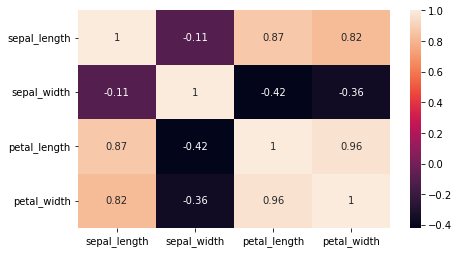

In [5]:
# Correlation heatmap - petal length and width look to be most associated
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

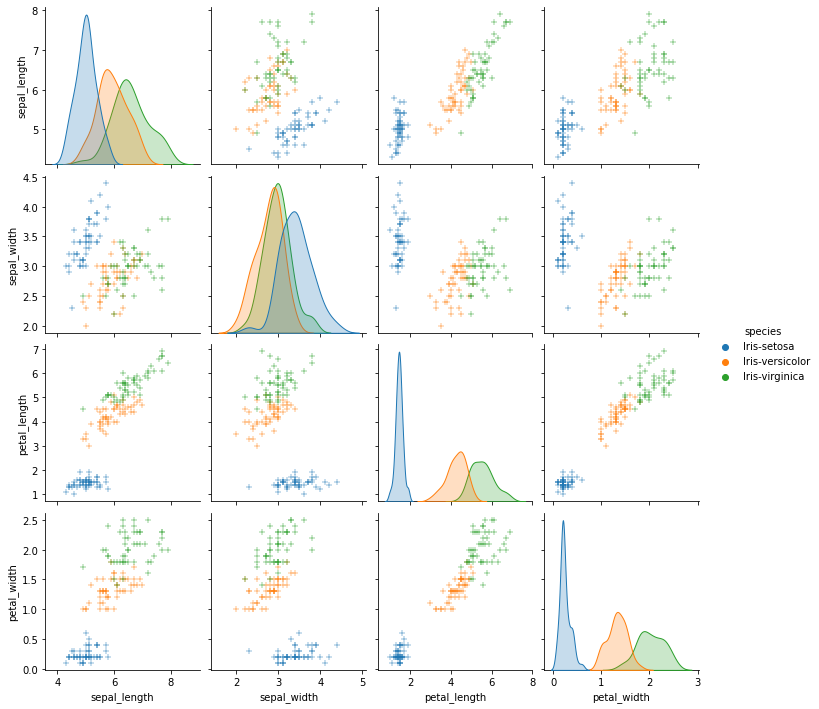

In [6]:
# An alternative correlation view - shows the strong association between petal length and width
g = sns.pairplot(df, hue='species', markers='+')
plt.show()

In [7]:
#Classify using the scikit-learn K-Nearest Neighbor algorithm
#Prepare the training and test data
# Create training and test dataframes based on a random 70/30 split
train_data, test_data = np.split(df.sample(frac=1, random_state=np.random.RandomState()), [int(0.7 * len(df))])


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Declare knn classifer; classify based on most common classification of 3 nearest neighbours
knn = KNeighborsClassifier(n_neighbors=3)

# Train knn model
knn.fit(train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train_data["species"])
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Predict using the model and the test data
preds_array = knn.predict(test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Convert the array to a dataframe with a single column called pred
preds_df = pd.DataFrame(preds_array, columns=['prediction'])

# Add the pred dataframe to the test dataframe by simply placing side by side
combined_df = test_data.reset_index(drop=True).join(preds_df)


In [10]:
# Predictions look good compared to the known class
combined_df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species,prediction
0,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
1,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
2,7.7,2.8,6.7,2.0,Iris-virginica,Iris-virginica
3,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
4,5.5,2.6,4.4,1.2,Iris-versicolor,Iris-versicolor
5,5.7,2.5,5.0,2.0,Iris-virginica,Iris-virginica
6,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
8,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor
9,7.9,3.8,6.4,2.0,Iris-virginica,Iris-virginica


In [11]:
# Prediction of species is largely correct compared to the observed species
pd.crosstab(combined_df['species'], combined_df['prediction'], rownames=['Actual species'], colnames=['Predicted species'])

Predicted species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual species,,,
Iris-setosa,17,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,1,15


In [12]:
#Classify using the SageMaker k-nearest neighbour algorithm
#Prepare the training and test data
# Reload CSV data into a Panda dataframe
df = pd.read_csv('./{}'.format(file_name), names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Remap species values to integers
df['species'] = df['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Move species column to first position
df = pd.concat([df['species'], df.drop(['species'], axis=1)], axis=1)


In [13]:
# Create training and test dataframes based on a random 70/30 split
train_data, test_data = np.split(df.sample(frac=1, random_state=np.random.RandomState()), [int(0.7 * len(df))])

In [14]:
#Create a knn model using the training data
import boto3
from datetime import datetime
import sagemaker
from sagemaker import get_execution_role
from sagemaker.predictor import csv_serializer, json_deserializer
from sagemaker.amazon.amazon_estimator import get_image_uri
iam = boto3.client('iam') 
# the role name is obtained from within AWS IAM 
role = iam.get_role(RoleName='AmazonSageMaker-ExecutionRole-20200308T223353')['Role']['Arn']

# S3 config
bucket = 'd3sd'
train_fname = 'iris-train.csv'
test_fname = 'iris-test.csv'
output_path = 's3://{}/output'.format(bucket)


In [15]:
# Save training and test data to local notebook instance (without indexes and headers)
train_data.to_csv(train_fname, index=False, header=False)
test_data.to_csv(test_fname, index=False, header=False)

In [16]:
# Save training and test data to S3
boto3.Session().resource('s3').Bucket(bucket).Object("{}/{}".format('train', train_fname)).upload_file(train_fname)
boto3.Session().resource('s3').Bucket(bucket).Object("{}/{}".format('test', test_fname)).upload_file(test_fname)


In [17]:
# Training config
job_name = 'iris-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))

In [18]:
# Declare knn estimator
knn = sagemaker.estimator.Estimator(get_image_uri(boto3.Session().region_name, "knn"),
                                        role,
                                        train_instance_count=1,
                                        train_instance_type='ml.m4.xlarge',
                                        output_path=output_path,
                                        sagemaker_session=sagemaker.Session())


The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [19]:
# Set mandatory hyperparameters; classify based on most common classification of 3 nearest neighbours
knn.set_hyperparameters(predictor_type='classifier',
                           feature_dim=4,
                           k=3,
                           sample_size=len(train_data))

In [20]:
# Define the data type and paths to the training and test data
content_type = "text/csv"
train_input = sagemaker.session.s3_input(s3_data="s3://{}/{}/".format(bucket, 'train'), content_type=content_type)
test_input = sagemaker.session.s3_input(s3_data="s3://{}/{}/".format(bucket, 'test'), content_type=content_type)


The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [21]:
# Train the knn model with just training data
knn.fit({'train': train_input},  job_name=job_name)

# Train the knn model with training and validation data
# knn.fit({'train': train_input, 'test': test_input},  job_name=job_name)


2022-06-17 23:46:16 Starting - Starting the training job...
2022-06-17 23:46:44 Starting - Preparing the instances for trainingProfilerReport-1655509575: InProgress
.........
2022-06-17 23:48:18 Downloading - Downloading input data
2022-06-17 23:48:18 Training - Downloading the training image............
2022-06-17 23:50:21 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[06/17/2022 23:50:16 INFO 139655350126400] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'_kvstore': 'dist_async', '_log_level': 'info', '_num_gpus': 'auto', '_num_kv_servers': '1', '_tuning_objective_metric': '', '_faiss_index_nprobe': '5', 'epochs': '1', 'feature_dim': 'auto', 'faiss_index_ivf_nlists': 'auto', 'index_metric': 'L2', 'index_type': 'faiss.Flat', 'mini_batch_size': '5000', '_enable_profiler': 'false'}
[06/17/2022 23:50:16

In [22]:
#Deploy the model on a SageMaker endpoint
# Deploy the model to a Sagemaker endpoint
knn_predictor = knn.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')
knn_predictor.serializer = csv_serializer
knn_predictor.deserializer = json_deserializer

--------!

In [23]:
#Predict species using the model and our test data
# Convert the test dataframe into an array and drop the species column on the fly
test_data_array = test_data.drop(['species'], axis=1).values

# Predict using the model and the test data
preds = knn_predictor.predict(test_data_array)

# Predict using the model and one set of flower values
# preds = knn_predictor.predict([4.8, 3.0, 1.4, 0.1])

# Convert JSON predictions to an array
preds_array = np.array([preds['predictions'][i]['predicted_label'] for i in range(len(preds['predictions']))])

# Convert the array to a dataframe with a single column called pred
preds_df = pd.DataFrame(preds_array, columns=['prediction'])

# Add the pred dataframe to the test dataframe by simply placing side by side
combined_df = test_data.reset_index(drop=True).join(preds_df)


The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [24]:
# Remap species integers back to original values
combined_df['species'] = combined_df['species'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})
combined_df['prediction'] = combined_df['prediction'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

In [25]:
# As with the previous model above, predictions look good compared to the known class
combined_df.head(20)

,species,sepal_length,sepal_width,petal_length,petal_width,prediction
0,Iris-setosa,4.9,3.0,1.4,0.2,Iris-setosa
1,Iris-setosa,4.8,3.0,1.4,0.3,Iris-setosa
2,Iris-versicolor,6.2,2.2,4.5,1.5,Iris-versicolor
3,Iris-setosa,4.4,2.9,1.4,0.2,Iris-setosa
4,Iris-setosa,5.0,3.2,1.2,0.2,Iris-setosa
5,Iris-virginica,6.0,3.0,4.8,1.8,Iris-virginica
6,Iris-versicolor,5.9,3.2,4.8,1.8,Iris-versicolor
7,Iris-setosa,5.1,3.4,1.5,0.2,Iris-setosa
8,Iris-versicolor,5.6,3.0,4.5,1.5,Iris-versicolor
9,Iris-virginica,6.3,2.8,5.1,1.5,Iris-versicolor


In [26]:
# Prediction of species is largely correct compared to the observed species
pd.crosstab(combined_df['species'], combined_df['prediction'], rownames=['Actual species'], colnames=['Predicted species'])

Predicted species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual species,,,
Iris-setosa,19,0,0
Iris-versicolor,0,11,0
Iris-virginica,0,2,13


In [27]:
#Delete the endpoint (to avoid running up a big bill)
sagemaker.Session().delete_endpoint(knn_predictor.endpoint)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
